In [102]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


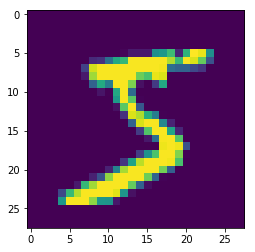

In [104]:

plt.imshow(x_train[0])

In [105]:
print y_train[0]

5


In [106]:
x_train = x_train.reshape((60000, 28*28)) 
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000, 28*28)) 
x_test = x_test.astype("float32") / 255


In [107]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [108]:
# from keras.optimizers import SGD,RMSprop
# rmsprop = RMSprop(lr=0.0001)
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',
              metrics=['accuracy'])

y_train = to_categorical(y_train)
print(y_train[0])

y_test = to_categorical(y_test)
print(y_test[0])
                   
model.fit(x_train, y_train,epochs=20, batch_size=1000, verbose=1)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.5046 - acc: 0.8569
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.2363 - acc: 0.9331: 0s - loss: 0.2384 - acc: 0.93
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1730 - acc: 0.9506
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1337 - acc: 0.9620
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1075 - acc: 0.9695
Epoch 6/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0888 - acc: 0.9747
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0743 - acc: 0.9791
Epoch 8/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0638 - acc: 0.9813 1s - loss: 0.064
Epoch 9/20
60000/60000 [==============================] - 6s 106us

In [109]:
y_pred = model.predict(x_test)
model.evaluate(x_test, y_test, verbose=0)



[0.065633006152839513, 0.97989999999999999]